# Pipelines 
- Pipelines chains together multiple steps so that the output of each step is used as input to the next step.
- Pipelines makes it easy to apply the same preprocessing to train and test!
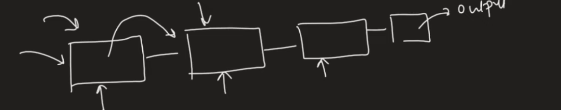

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv('train_pipeline.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [6]:
#Step 1 --> train/test/split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Survived']),
                                                 df['Survived'],
                                                 test_size=0.2,
                                                random_state=42)

In [7]:
X_train.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.5,0,0,28.5,S
733,2,male,23.0,0,0,13.0,S


In [8]:
y_train.head(2)

331    0
733    0
Name: Survived, dtype: int64

In [9]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [45]:
# Applying imputation

si_age = SimpleImputer() #replacing with by default value as mean
si_embarked = SimpleImputer(strategy='most_frequent') #replacing with by default value as most_frequent

X_train_age = si_age.fit_transform(X_train[['Age']]) 
X_train_embarked = si_embarked.fit_transform(X_train[['Embarked']])

X_test_age = si_age.transform(X_test[['Age']])
X_test_embarked = si_embarked.transform(X_test[['Embarked']])

In [46]:
# X_train_embarked

In [47]:
X_train.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.5,0,0,28.5,S
733,2,male,23.0,0,0,13.0,S


In [48]:
# one hot encoding Sex and Embarked

ohe_sex = OneHotEncoder(sparse_output=False,handle_unknown='ignore',dtype=int)
ohe_embarked = OneHotEncoder(sparse_output=False,handle_unknown='ignore',dtype=int)

X_train_sex = ohe_sex.fit_transform(X_train[['Sex']])
X_train_embarked = ohe_embarked.fit_transform(X_train_embarked)

X_test_sex = ohe_sex.transform(X_test[['Sex']])
X_test_embarked = ohe_embarked.transform(X_test_embarked)

In [50]:
X_train_embarked

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [51]:
X_train_sex

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [0, 1],
       [1, 0],
       [0, 1]])

In [52]:
X_train_rem = X_train.drop(columns=['Sex','Age','Embarked'])
X_test_rem = X_test.drop(columns=['Sex','Age','Embarked'])

In [53]:
X_train_transformed = np.concatenate((X_train_rem,X_train_age,X_train_sex,X_train_embarked),axis=1)
X_test_transformed = np.concatenate((X_test_rem,X_test_age,X_test_sex,X_test_embarked),axis=1)

In [54]:
X_test_transformed.shape

(179, 10)

In [55]:
clf = DecisionTreeClassifier()
clf.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [56]:
y_pred = clf.predict(X_test_transformed)

In [57]:
y_pred

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.776536312849162

In [59]:
import pickle

In [63]:
pickle.dump(ohe_sex,open('ohe_sex.pkl','wb'))
pickle.dump(ohe_embarked,open('ohe_embarked.pkl','wb'))
pickle.dump(clf,open('clf.pkl','wb'))